<a href="https://colab.research.google.com/github/riyagpt0251/RainFall-Prediction/blob/main/RainFall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


load the dataset

In [10]:
df = pd.read_csv('1. Weather Data.csv')

# Display the first few rows to understand the structure of the dataset
print(df.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


Data preprocessing

In [11]:
print(df.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


convert date time to date time format

In [15]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [16]:
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

In [17]:
df.drop('Date/Time', axis=1, inplace=True)

Handling missing valuews

In [18]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [19]:
df = pd.get_dummies(df, columns=['Weather'], drop_first=True)

Confirm the data is cleaned

In [20]:
print(df.head())

   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9         86                4            8.0   
1    -1.8              -3.7         87                4            8.0   
2    -1.8              -3.4         89                7            4.0   
3    -1.5              -3.2         88                6            4.0   
4    -1.5              -3.3         88                7            4.8   

   Press_kPa  Year  Month  Day  Hour  ...  Weather_Snow,Fog  \
0     101.24  2012      1    1     0  ...             False   
1     101.24  2012      1    1     1  ...             False   
2     101.26  2012      1    1     2  ...             False   
3     101.27  2012      1    1     3  ...             False   
4     101.23  2012      1    1     4  ...             False   

   Weather_Snow,Haze  Weather_Snow,Ice Pellets  Weather_Thunderstorms  \
0              False                     False                  False   
1              False          

Assume 'Raainfall' is the column we want to predict

In [37]:
X = df.drop('Temp_C', axis=1)  # Features (exclude 'rainfall')
y = df['Temp_C']

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split into training set and test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train the machine learning  model

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

predict on test data

In [26]:
y_pred = model.predict(X_test)

Evaluate the mean square

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [28]:

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.0084669030599268e-06
Root Mean Squared Error: 0.001004224528210662
R-squared: 0.0


In [36]:
# Check the first few predictions
print("Predictions:", y_pred[:10])
print("Actual values:", y_test[:10])


Predictions: [ 0.00046     0.00055008 -0.00032579  0.00021036  0.00080964  0.00078499
  0.00038172  0.00083422 -0.00038438 -0.00067536]
Actual values: 6385    False
1488    False
6539    False
3153    False
496     False
3422    False
95      False
3710    False
3518    False
318     False
Name: Weather_Thunderstorms, dtype: bool


Visualize the result

/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7093: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


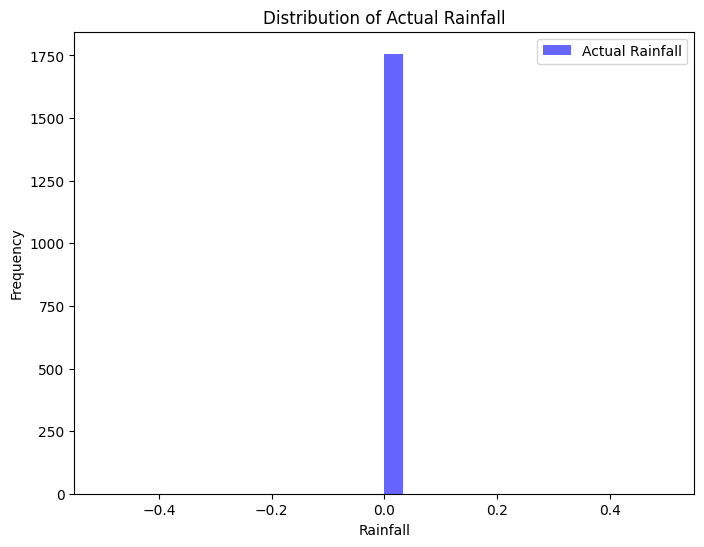

In [39]:
# Check the distribution of the actual rainfall values
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, color='blue', alpha=0.6, label='Actual Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Rainfall')
plt.legend()
plt.show()


save the model

In [33]:
import joblib
joblib.dump(model, 'rainfall_predictor_model.pkl')

['rainfall_predictor_model.pkl']